<a href="https://colab.research.google.com/github/scanavi31/TalentoTech/blob/main/PROYECTO_FINAL_IA_BASICO_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final Inteligencia Artificial Nivel Básico

# Comprensión del negocio

## Objetivos:
- Aplicar los conocimientos adquiridos a un conjunto de datos para clasificación en el sector salud

## Descripción

El objetivo de este proyecto es predecir si una persona tiene diabetes a partir de un conjunto de datos que incluye variables como edad, género, hipertensión, enfermedad cardíaca, historial de tabaquismo, índice de masa corporal (IMC), nivel de hemoglobina A1c y nivel de glucosa en sangre. Se aplicará una Red Neuronal para clasificación, tras realizar un Análisis Exploratorio de Datos (EDA), limpieza, y transformaciones necesarias para mejorar el rendimiento del modelo.

## Impacto del Proyecto

Una clasificación precisa permitirá identificar a personas en riesgo de diabetes y ayudarlas a tomar medidas preventivas o de tratamiento temprano.

# Comprensión de los datos

## Librerías

In [ ]:
# importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
%matplotlib inline

## Exploración
Carga de datos de csv en un DataFrame y exploración de datos.

La primera columna del fichero debe aparecer como índice del DataFrame.

In [ ]:
# Monta Google drive
from google.colab import drive  # Importa el módulo 'drive' de la biblioteca 'google.colab'
drive.mount('/content/drive')   # Monta Google Drive en el entorno de Google Colab para acceder a los archivos almacenados en Google Drive

Mounted at /content/drive


In [ ]:
# Ruta del archivo
ruta_archivo = "/content/drive/MyDrive/Mentoría/proyecto - dataset predicción de diabetes.csv"

In [ ]:
# Especificar el delimitador
delimitador = ','
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo, delimiter=delimitador)

In [ ]:
# Primeras filas de df
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# información del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Información estadistica del df (numerica)
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Información estadistica del df (categorica)
df.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [ ]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

Breve descripción de cada una de las características del dataset:

1. age (Edad):
   Descripción: La edad de la persona en años.

2. hypertension (Hipertensión):
   Descripción: Indica si la persona tiene hipertensión arterial (1: Sí, 0: No). La hipertensión es una condición en la que la presión arterial es más alta de lo normal.

3. heart_disease (Enfermedad cardíaca):
   Descripción: Indica si la persona tiene alguna enfermedad del corazón (1: Sí, 0: No).

4. smoking_history (Historial de tabaquismo):
   Descripción: Historial de tabaquismo de la persona. Incluye varias categorías, como:
   
   * never: La persona nunca ha fumado.
   * No Info: No se dispone de información sobre el historial de tabaquismo de la persona.
   * current: La persona es fumadora activa en el momento actual.
   * former: La persona fue fumadora en el pasado, pero ha dejado de fumar.
   * ever: La persona ha fumado en algún momento de su vida, pero no especifica si es actual o ex-fumadora.
   * not current: La persona no fuma actualmente, pero pudo haber fumado en el pasado (es similar a la categoría "former", pero con menos precisión).

5. bmi (Índice de masa corporal):
   Descripción: Relación entre el peso y la altura de la persona, utilizada para categorizar el peso corporal como bajo, normal, sobrepeso o obesidad.

6. HbA1c_level (Nivel de hemoglobina A1c):
   Descripción: El nivel de hemoglobina A1c, mide el promedio de glucosa en la sangre durante los últimos 2-3 meses. Es un indicador clave para el diagnóstico y seguimiento de la diabetes. Se conoce como hemoglobina glucosilada. *Si tiene diabetes, un nivel ideal de HbA1c es 48 mmol/mol (6,5 %) o menos.*(https://www.diabetes.org.uk/guide-to-diabetes/managing-your-diabetes/hba1c)

7. blood_glucose_level (Nivel de glucosa en sangre):
   Descripción: Mide la cantidad de glucosa (azúcar) en la sangre en un momento específico, importante para evaluar el control de la glucosa en personas con diabetes.

8. diabetes (Diabetes):
   Descripción: Variable objetivo que indica si la persona tiene diabetes (1: Sí, 0: No).

# Preparación de los datos

Nota: Antes de continuar, para obtener datos para análisis estadístico que sean acertados y fiables se revisa si se tienen datos duplicados y se pasan a eliminar

In [ ]:
# Revisar si hay duplicados
duplicados = df.duplicated()
# Mostrar la cantidad de duplicados
print(f'\nCantidad de duplicados: {duplicados.sum()}')


Cantidad de duplicados: 3854


In [ ]:
# Revisar valores nulos
valores_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos)


Valores nulos por columna:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
other_count = (df['gender'] == 'Other').sum()
print(f"Número de 'Other' en la variable 'gender': {other_count}")


Número de 'Other' en la variable 'gender': 18


In [ ]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


## Eliminar duplicados

In [ ]:
# Eliminar duplicados
df_cleaned = df.drop_duplicates()
# Verificar si se eliminaron duplicados
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


## Manejo de Valores Nulos (NO)

## Detectar y Manejar Outliers

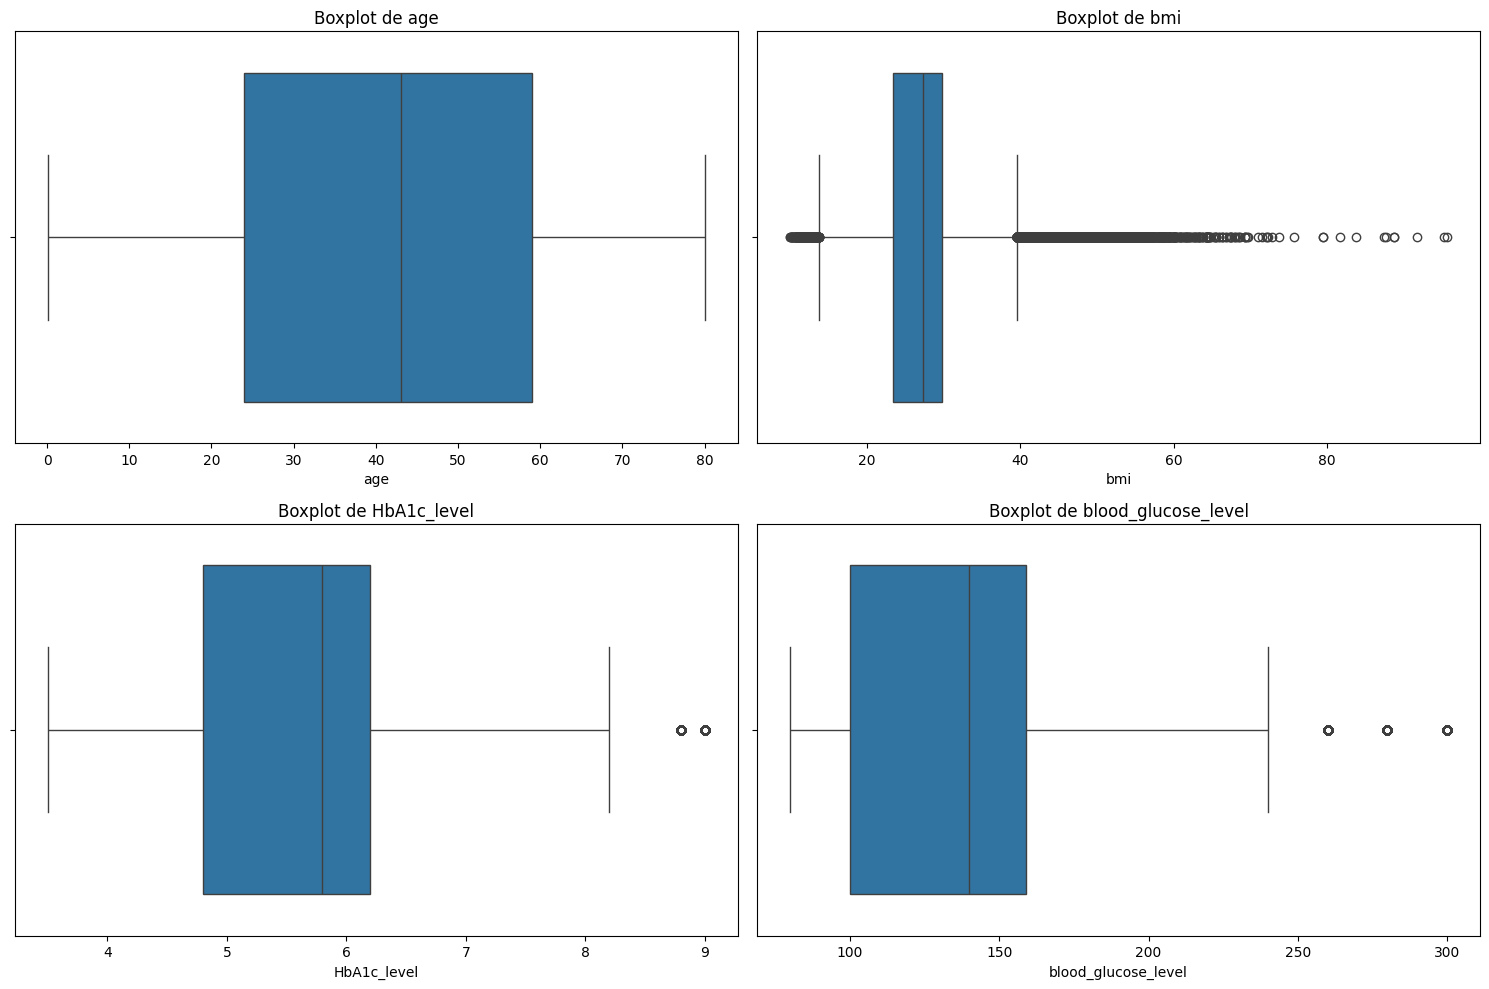

In [ ]:
# Crear una figura con subplots para cada característica
plt.figure(figsize=(15, 10))

# Lista de características a visualizar
caracteristicas = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Iterar sobre las características y crear un boxplot para cada una
for i, caracteristica in enumerate(caracteristicas):
  plt.subplot(2, 2, i + 1)
  sns.boxplot(x=df_cleaned[caracteristica])
  plt.title(f'Boxplot de {caracteristica}')

plt.tight_layout()
plt.show()


In [ ]:
# Crear una copia del DataFrame para evitar modificar el original
df_outlier = df_cleaned.copy()

# Definir una función para detectar outliers usando el rango intercuartílico (IQR)
def detectar_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = (data < lower_bound) | (data > upper_bound)
  return outliers, lower_bound, upper_bound

caracteristicas = ['bmi']
# Iterar sobre las columnas numéricas y detectar outliers
for caracteristica in caracteristicas:
  outliers, lower_bound, upper_bound = detectar_outliers_iqr(df_outlier[caracteristica])
  # Reemplazar outliers con el valor medio de la columna
  df_outlier.loc[outliers, caracteristica] = upper_bound

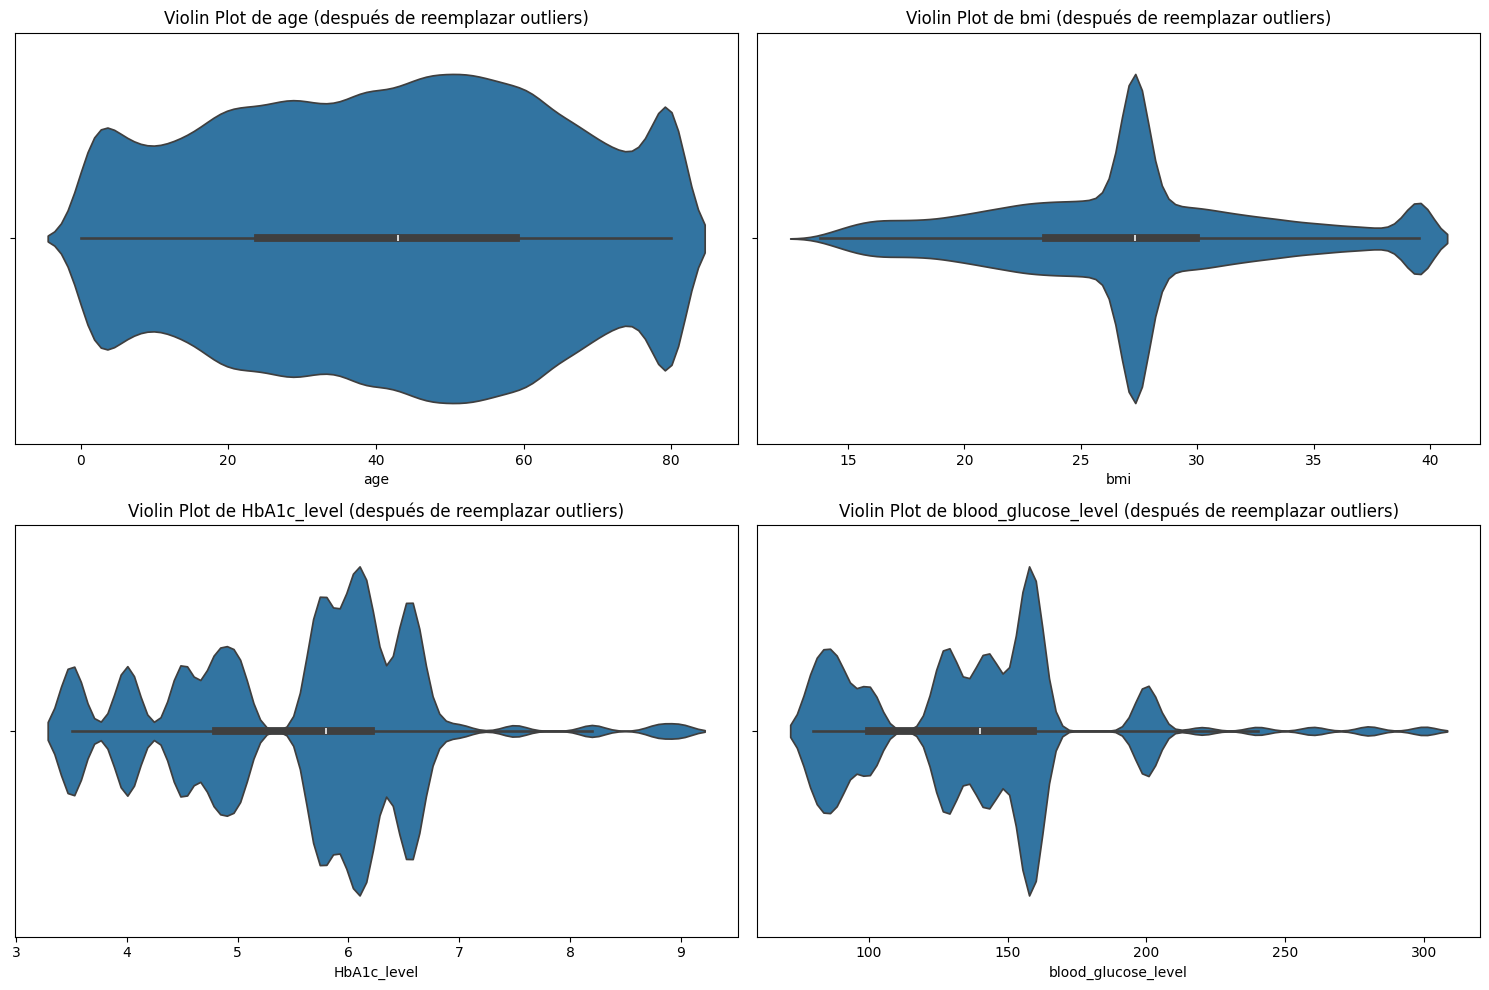

In [ ]:
# Crear una figura con subplots para cada característica
plt.figure(figsize=(15, 10))

# Lista de características a visualizar
caracteristicas = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Iterar sobre las características y crear un violinplot para cada una
for i, caracteristica in enumerate(caracteristicas):
  plt.subplot(2, 2, i + 1)
  sns.violinplot(x=df_outlier[caracteristica])
  plt.title(f'Violin Plot de {caracteristica} (después de reemplazar outliers)')

plt.tight_layout()
plt.show()


## Ajustar Datos (Transformaciones)

In [ ]:
# convertir variables categoricas a numericas
encoder_genero = LabelEncoder()
df_outlier['gender'] = encoder_genero.fit_transform(df_outlier['gender'])

In [ ]:
encoder_fumar = LabelEncoder()
df_outlier['smoking_history'] = encoder_fumar.fit_transform(df_outlier['smoking_history'])
df_outlier.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
df_outlier[df_outlier['gender']==2]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,2,10.0,0,0,5,14.09,5.0,140,0
14838,2,19.0,0,0,0,27.32,5.7,158,0
16702,2,39.0,0,0,5,31.24,6.2,85,0
18691,2,10.0,0,0,5,16.59,6.1,160,0
23266,2,23.0,0,0,0,24.23,6.1,140,0
31985,2,53.0,0,0,0,27.32,6.6,160,0
33805,2,45.0,0,0,4,27.32,4.0,159,0
34929,2,47.0,0,0,4,36.76,6.6,90,0
35006,2,47.0,0,0,4,36.76,3.5,200,0
40337,2,18.0,0,0,5,30.19,6.1,90,0


## Normalización de variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columnas_a_normalizar = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df_outlier[columnas_a_normalizar] = scaler.fit_transform(df_outlier[columnas_a_normalizar])
df_outlier.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.000000,0,1,4,0.444272,0.563636,0.272727,0
1,0,0.674675,0,0,0,0.526703,0.563636,0.000000,0
2,1,0.349349,0,0,4,0.526703,0.400000,0.354545,0
3,0,0.449449,0,0,1,0.376935,0.272727,0.340909,0
4,1,0.949950,1,1,1,0.248839,0.236364,0.340909,0


## Revisión de distribución de clases

Conteo de clases en la columna diabetes: diabetes
0    87664
1     8482
Name: count, dtype: int64


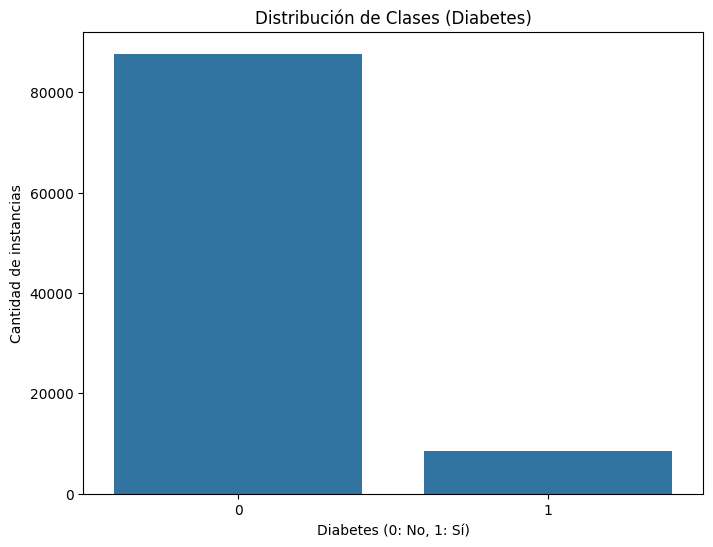

In [ ]:
# Contar la cantidad de instancias para cada clase en la columna 'diabetes'
conteo_clases = df_outlier['diabetes'].value_counts()

# Imprimir el conteo de clases
print(f'Conteo de clases en la columna diabetes: {conteo_clases}')

# Visualizar la distribución de clases usando un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df_outlier)
plt.title('Distribución de Clases (Diabetes)')
plt.xlabel('Diabetes (0: No, 1: Sí)')
plt.ylabel('Cantidad de instancias')
plt.show()


### Aplicar una combinación de sobremuestreo y submuestreo (Hybrid Sampling)

En la industria de la ciencia de datos, a menudo tenemos que lidiar con datos desequilibrados. Es uno de los mayores problemas en la ciencia de datos.

*¿Por qué es necesario el equilibrio?*

Siempre que entrena su modelo con datos desequilibrados, a menudo obtiene resultados erróneos después del entrenamiento. En este caso, el modelo se sesga hacia la clase mayoritaria y, a menudo, el modelo se vuelve incapaz de capturar la complejidad de los datos. En estos casos, a menudo obtenemos una alta precisión que conduce a algunas perspectivas engañosas del modelo. Por lo tanto, utilizamos diferentes métricas de evaluación

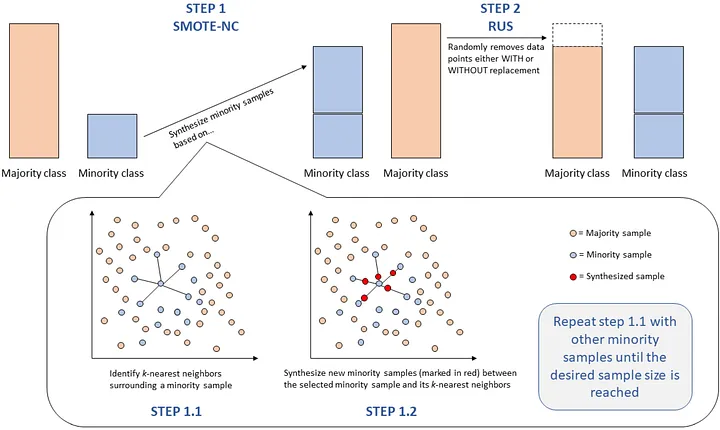

In [ ]:
# Definir las etapas del pipeline
sobre_muestreo = SMOTE(sampling_strategy=0.5)  # Sobremuestrear la clase minoritaria hasta que represente el 50% de la clase mayoritaria
sub_muestreo = RandomUnderSampler(sampling_strategy=0.8) # Submuestrear la clase mayoritaria hasta que represente el 80% de la clase minoritaria

steps = [('o', sobre_muestreo), ('u', sub_muestreo)]
pipeline = Pipeline(steps=steps)

# Separar las características (X) y la variable objetivo (y)
X = df_outlier.drop('diabetes', axis=1)
y = df_outlier['diabetes']

# Aplicar el pipeline para realizar el sobremuestreo y submuestreo
X_balanceado, y_balanceado = pipeline.fit_resample(X, y)
df_balanceado = pd.DataFrame(X_balanceado, columns=X.columns)
df_balanceado['diabetes'] = y_balanceado
df_balanceado.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1184,1,0.211712,0,0,0,0.526703,0.400000,0.545455,0
8725,0,0.499499,0,0,4,0.391254,0.545455,0.209091,0
35286,0,0.699700,1,0,0,0.567724,0.563636,0.227273,0
73521,0,0.862362,0,0,0,0.526703,0.545455,0.354545,0
89825,1,0.687187,0,0,4,0.493034,0.545455,0.022727,0


En aprendizaje automático, un pipeline es una forma de encadenar múltiples pasos de procesamiento de datos en una sola secuencia.

Imagina una fábrica: los datos entran como materia prima, pasan por diferentes etapas de transformación (limpieza, transformación, etc.) y salen como un producto terminado (un modelo entrenado). El pipeline organiza y automatiza este flujo de trabajo.

Conteo de clases en la columna diabetes: diabetes
0    54790
1    43832
Name: count, dtype: int64


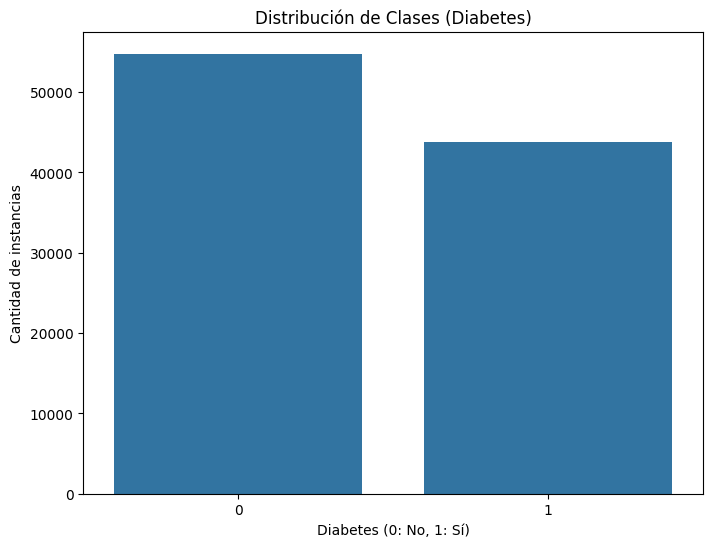

In [ ]:
# Contar la cantidad de instancias para cada clase en la columna 'diabetes'
conteo_clases = df_balanceado['diabetes'].value_counts()

# Imprimir el conteo de clases
print(f'Conteo de clases en la columna diabetes: {conteo_clases}')

# Visualizar la distribución de clases usando un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df_balanceado)
plt.title('Distribución de Clases (Diabetes)')
plt.xlabel('Diabetes (0: No, 1: Sí)')
plt.ylabel('Cantidad de instancias')
plt.show()

## Generar Visualizaciones y Estadística Descriptiva

In [ ]:
# Estadística descriptiva
df_balanceado.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,98622.000000,98622.000000,98622.000000,98622.000000,98622.000000,98622.000000,98622.000000,98622.000000,98622.000000
mean,0.438847,0.615983,0.143051,0.082618,2.446057,0.579502,0.467757,0.362567,0.444444
std,0.496514,0.271866,0.350127,0.275306,1.810981,0.233427,0.229092,0.250980,0.496907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.424424,0.000000,0.000000,0.000000,0.456269,0.400000,0.227273,0.000000
50%,0.000000,0.662162,0.000000,0.000000,3.000000,0.526703,0.472727,0.340909,0.000000
75%,1.000000,0.828602,0.000000,0.000000,4.000000,0.728328,0.563636,0.363636,1.000000
max,2.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Restablecer el índice del DataFrame para evitar duplicados en el índice
df_balanceado.reset_index(drop=True, inplace=True)

In [ ]:
df_balanceado[df_balanceado['gender']==2]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2687,2,0.486987,0,0,5,0.678406,0.490909,0.022727,0
6109,2,0.236737,0,0,0,0.526703,0.400000,0.354545,0
8747,2,0.562062,0,0,4,0.526703,0.090909,0.359091,0
9103,2,0.236737,0,0,0,0.526703,0.000000,0.363636,0
10625,2,0.324324,0,0,5,0.920279,0.454545,0.000000,0
10990,2,0.124124,0,0,5,0.014706,0.272727,0.272727,0
15132,2,0.299299,0,0,5,0.354102,0.490909,0.363636,0
16321,2,0.649650,0,0,5,0.693498,0.563636,0.359091,0
21773,2,0.124124,0,0,5,0.111455,0.472727,0.363636,0
27615,2,0.587087,0,0,4,0.892028,0.000000,0.545455,0


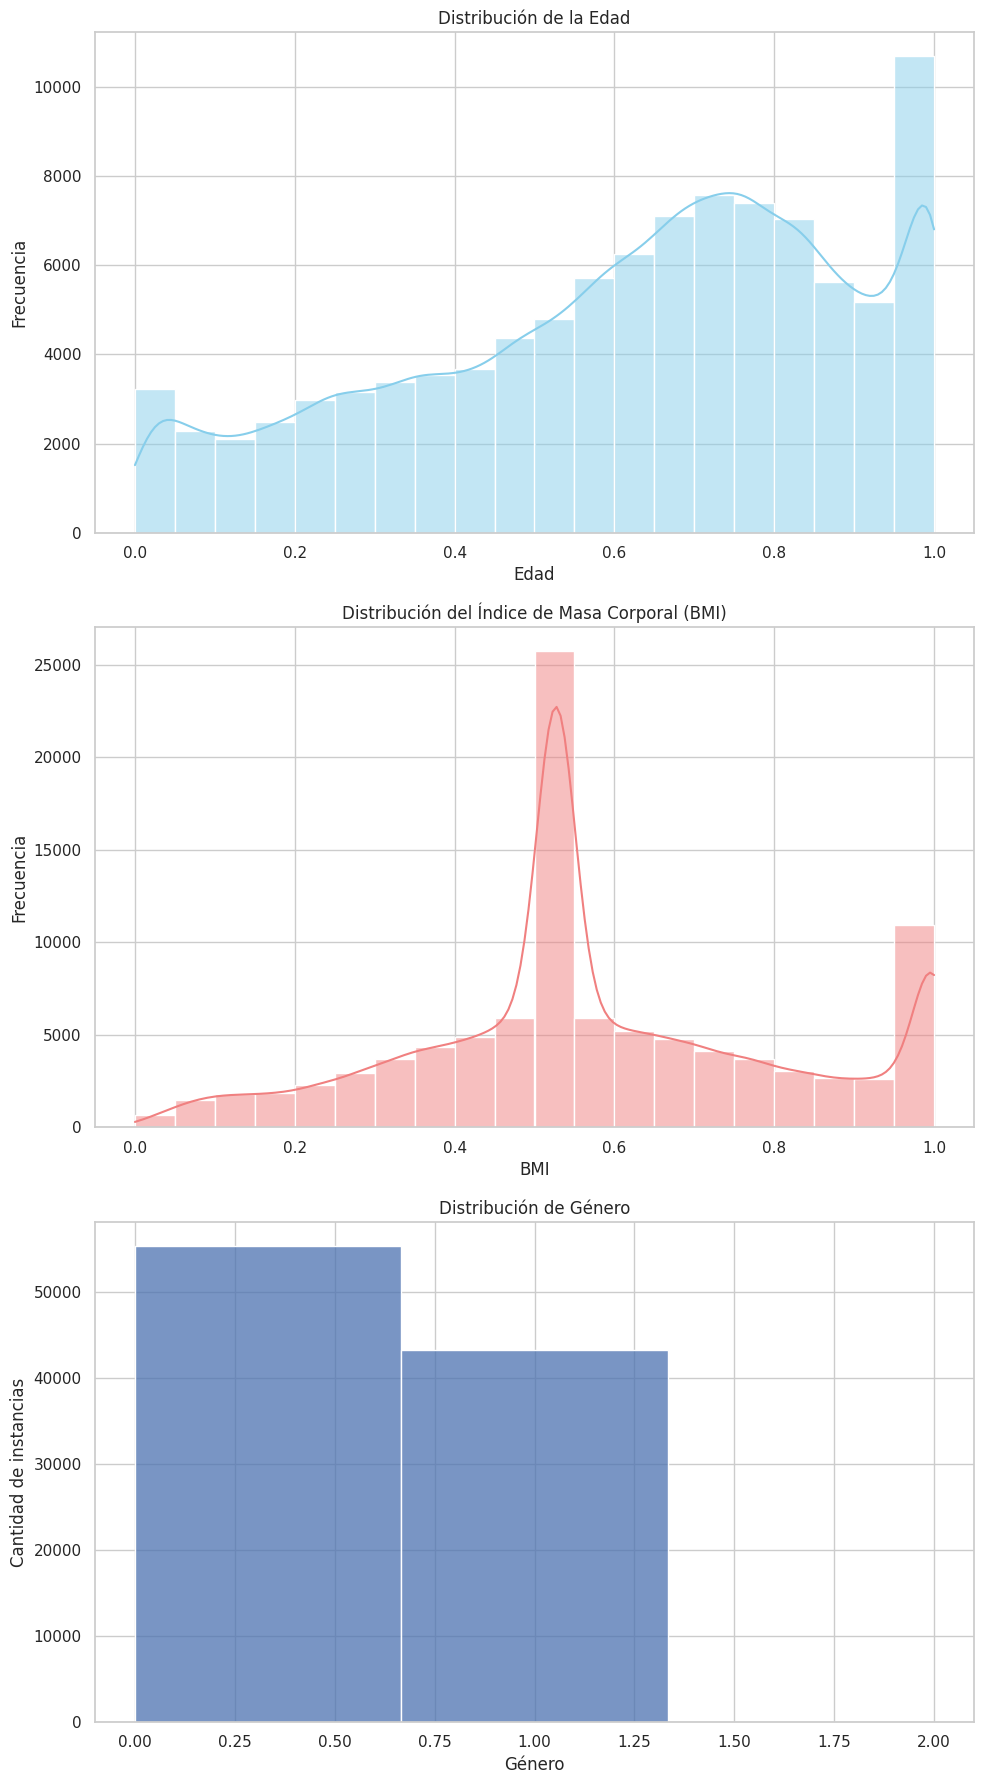

In [ ]:
# Visualizaciones
# Ajustar estilo de gráficos
sns.set(style="whitegrid")

# Crear el lienzo con 3 subplots en una columna
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Distribución de la edad
sns.histplot(df_balanceado['age'], kde=True, bins=20, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de la Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Distribución de BMI
sns.histplot(df_balanceado['bmi'], kde=True, bins=20, color='lightcoral', ax=axes[1])
axes[1].set_title('Distribución del Índice de Masa Corporal (BMI)')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frecuencia')

# Distribución de Género
sns.histplot(df_balanceado['gender'], bins=3, ax=axes[2])
axes[2].set_title('Distribución de Género')
axes[2].set_xlabel('Género')
axes[2].set_ylabel('Cantidad de instancias')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

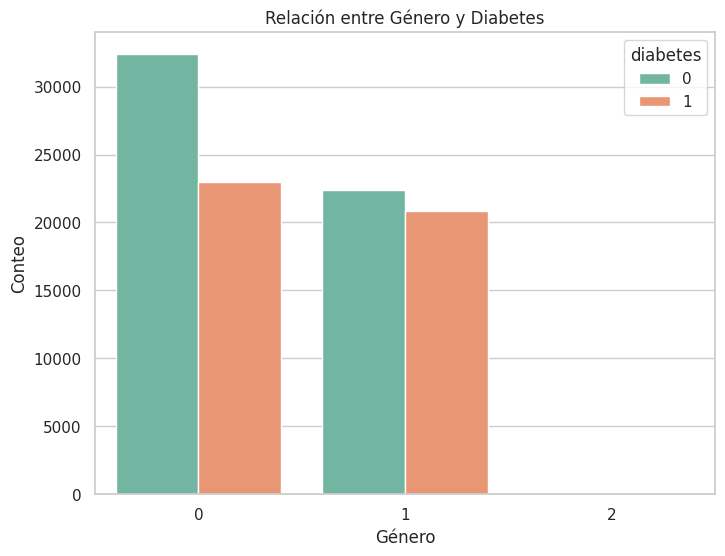

In [ ]:

#Relación entre Género y Diabetes
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='diabetes', data=df_balanceado, palette='Set2')
plt.title('Relación entre Género y Diabetes')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.show()

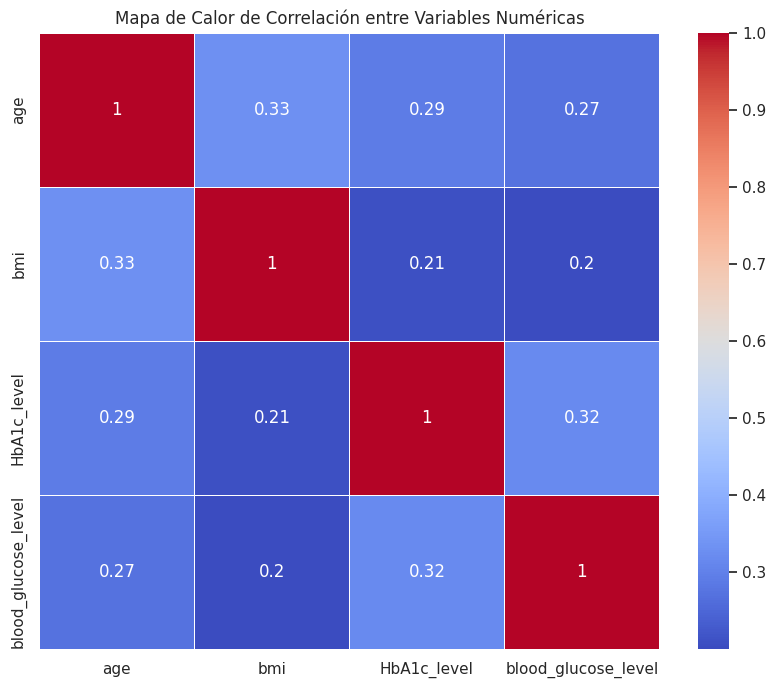

In [ ]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
corr_matrix = df_balanceado[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()


Correlación con la variable objetivo (diabetes):
diabetes               1.000000
HbA1c_level            0.599643
blood_glucose_level    0.544986
age                    0.482749
bmi                    0.360511
hypertension           0.262137
heart_disease          0.210108
smoking_history        0.162082
gender                 0.066680
Name: diabetes, dtype: float64


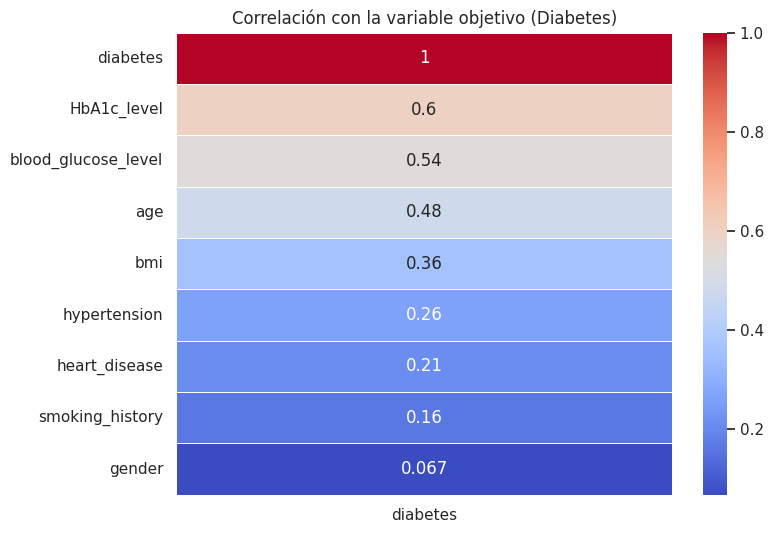

In [ ]:

import matplotlib.pyplot as plt
# Correlación con la variable objetivo
correlation_with_target = df_balanceado.corr()['diabetes'].sort_values(ascending=False)

# Imprimir la correlación con la variable objetivo
print("\nCorrelación con la variable objetivo (diabetes):")
print(correlation_with_target)

# Visualizar la correlación con la variable objetivo
plt.figure(figsize=(8, 6))
sns.heatmap(df_balanceado.corr()[['diabetes']].sort_values(by=['diabetes'], ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación con la variable objetivo (Diabetes)')
plt.show()


## Guardar conjunto de datos

In [ ]:
# Guardar el DataFrame limpio y procesado en un nuevo archivo CSV
df_balanceado.to_csv('/content/drive/MyDrive/Colab Notebooks/TalentoTech/datos_proyecto_IA.csv', index=False)

# Modelado

## Conjunto de entrenamiento y prueba

In [ ]:
X = df_balanceado.drop('diabetes', axis=1)
y = df_balanceado ['diabetes']
X_train, X_test,y_train, y_test=train_test_split( X , y , test_size= 0.1 , random_state= 42 )

## Arquitectura Red Neuronal

In [ ]:
dimensiones_X= X_train.shape
Neuronas_entrada= dimensiones_X[1]
modelo= Sequential([
    Dense(512 , activation = 'relu' , input_shape= [Neuronas_entrada]),
    Dropout( 0.2 ),
    Dense(256 , activation = 'relu'),
    Dropout( 0.2 ),
    Dense(64 , activation = 'relu'),
    Dropout( 0.1 ) ,
    Dense(1,activation = 'sigmoid')
])
modelo.compile(optimizer = Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Entrenamiento Red Neuronal

In [ ]:
history = modelo.fit( X_train , y_train , epochs = 20,validation_split=0.2)

Epoch 1/20
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.8489 - loss: 0.3196 - val_accuracy: 0.8864 - val_loss: 0.2310
Epoch 2/20
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.8910 - loss: 0.2293 - val_accuracy: 0.8990 - val_loss: 0.2030
Epoch 3/20
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8961 - loss: 0.2115 - val_accuracy: 0.9013 - val_loss: 0.2070
Epoch 4/20
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9012 - loss: 0.2029 - val_accuracy: 0.9035 - val_loss: 0.1946
Epoch 5/20
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9004 - loss: 0.2018 - val_accuracy: 0.9039 - val_loss: 0.1944
Epoch 6/20
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9002 - loss: 0.2019 - val_accuracy: 0.8965 - val_loss: 0.2067
Epoch 7/20
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9012 - loss: 0.2025 - val_accuracy: 0.8989 - val_loss: 0.2016
Epoch 8/20
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9052 - loss: 

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

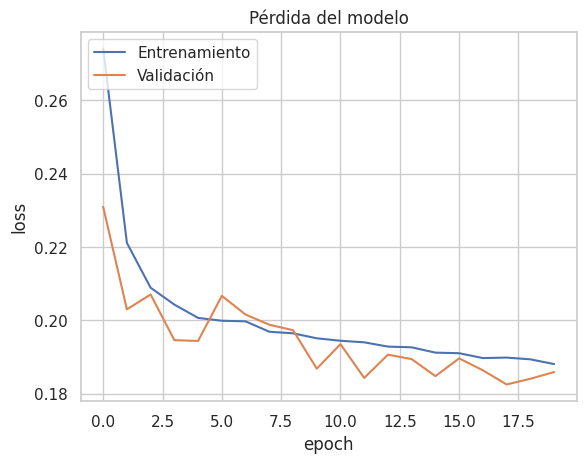

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

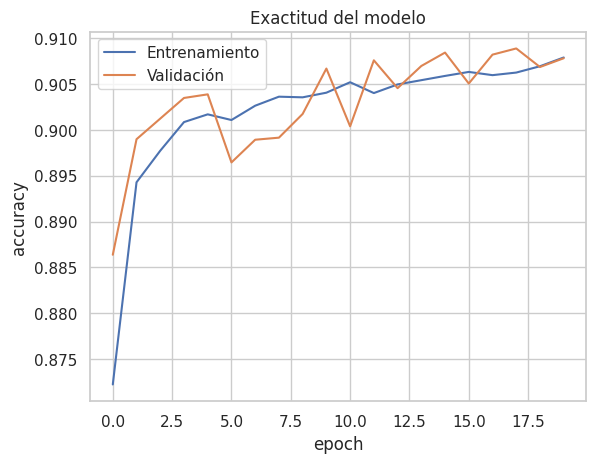

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

# Evaluación

## Predicciones

In [ ]:
arr_y_pred_prob= modelo.predict( X_test)
Limite = 0.5
y_pred= np.where(arr_y_pred_prob<=Limite , 0 , 1 )

309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
arr_tasaFP, arr_tasaVP, umbrales= roc_curve( y_test, arr_y_pred_prob)
auc1 = roc_auc_score( y_test, arr_y_pred_prob)
auc2 = auc( arr_tasaFP, arr_tasaVP)
arr_tasaFP, arr_tasaVP, umbrales= roc_curve( y_test, y_pred)
auc3 = roc_auc_score( y_test, y_pred)
auc4 = auc( arr_tasaFP, arr_tasaVP)
exactitud = accuracy_score ( y_test , y_pred)
precision = precision_score ( y_test , y_pred)
sensibilidad = recall_score ( y_test , y_pred)
array_matriz_confusion = confusion_matrix ( y_test , y_pred)

In [ ]:
print(f'Exactitud: {exactitud}')
print(f'Precision: {precision}')
print(f'Sensibilidad: {sensibilidad}')
print(f'AUC1: {auc1}')
print(f'AUC2: {auc2}')
print(f'AUC3: {auc3}')
print(f'AUC4: {auc4}')

Exactitud: 0.9073304268478151
Precision: 0.8978068128791414
Sensibilidad: 0.8899167437557817
AUC1: 0.9769190054076224
AUC2: 0.9769190054076224
AUC3: 0.9054205491662101
AUC4: 0.9054205491662101


## Graficar resultados

Text(0.5, 1.0, 'Curva ROC')

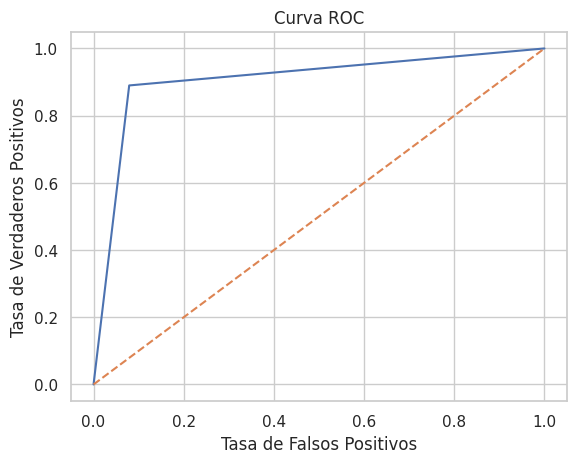

In [ ]:
plt.plot( arr_tasaFP, arr_tasaVP)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')

In [ ]:
mc = confusion_matrix(y_test, y_pred)
mc

array([[5101,  438],
       [ 476, 3848]])

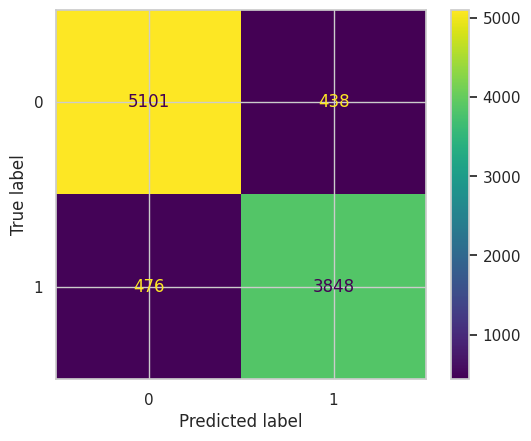

In [ ]:
ConfusionMatrixDisplay(mc).plot()

In [ ]:
# Generar el reporte de clasificación
reporte = classification_report(y_test, y_pred)

# Imprimir el reporte
print(reporte)


              precision    recall  f1-score   support

           0       0.91      0.92      0.92      5539
           1       0.90      0.89      0.89      4324

    accuracy                           0.91      9863
   macro avg       0.91      0.91      0.91      9863
weighted avg       0.91      0.91      0.91      9863

